
------ /standardScaler/y_IPAQ_x_totalArea ------

[SVC]
Confusion Matrix

[[  0   0  21]
 [  0   0  32]
 [  0   0 107]]

Accuracy: 0.67

Micro Precision: 0.67
Micro Recall: 0.67
Micro F1-score: 0.67

Macro Precision: 0.22
Macro Recall: 0.33
Macro F1-score: 0.27

Weighted Precision: 0.45
Weighted Recall: 0.67
Weighted F1-score: 0.54

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        21
     Class 2       0.00      0.00      0.00        32
     Class 3       0.67      1.00      0.80       107

    accuracy                           0.67       160
   macro avg       0.22      0.33      0.27       160
weighted avg       0.45      0.67      0.54       160



/Users/zclalala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zclalala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zclalala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zclalala/opt/anaconda3/lib/python3.8/site-

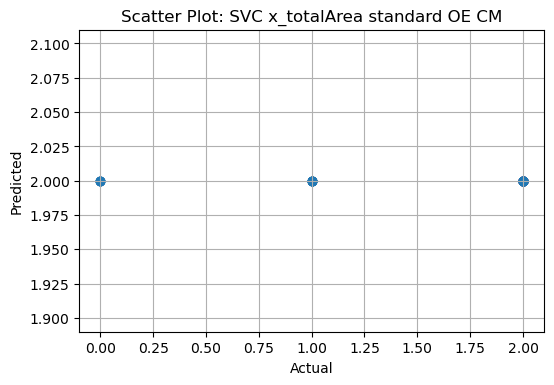

In [3]:
# -*- coding: utf-8 -*-
# confusion_matrix
# author: Cheng Zheng

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

path = os.getcwd()#get current path
path_project = os.path.dirname(path)#go up one directory

scaler_lists = ['/standardScaler', '/minMaxScaler', '/robustScaler']
for scaler_list in scaler_lists:
    loadfile = scaler_list+scaler_list+'.xlsx'
    savefile = scaler_list+'/y_IPAQ_x_totalArea' #[scaler_list+'/y_IPAQ_x_totalArea', scaler_list+'/y_IPAQ']
    dataset = pd.read_excel(path_project+loadfile)#to import the preprocessed dataset into a variable

    # j = 0 if ('_x' in savefile) else 1 
    # k = 0 if ('standard' in savefile) else (1 if ('minMax' in savefile) else (2 if ('robust' in savefile) else 3))


    txt = path_project+scaler_list+scaler_list+'_CM_1.txt'
    f1 = open(txt, 'a')

    print("\n------ %s ------" %savefile)
    f1.write("\n------ %s ------" %savefile)
    print("\n[SVC]")
    f1.write("\n[SVC]")


    X = pd.DataFrame(dataset.loc[:,['aveML_RMS','aveDisplacement','aveVelocity','aveAP_RMS','aveTotalArea']]) if j == 1 else dataset['aveTotalArea'].values.reshape(-1, 1)
    y = dataset['IPAQ']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    svc = SVC(kernel='rbf', C=1).fit(X_train, y_train)
    y_pred = svc.predict(X_test)


    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix\n')
    f1.write('Confusion Matrix\n')
    print(confusion)


    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
    f1.write('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))
    f1.write('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    f1.write('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    f1.write('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))
    f1.write('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    f1.write('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    f1.write('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    f1.write('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    f1.write('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    f1.write('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))
    f1.write('\nClassification Report\n')
    f1.write(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

    f1.close()

# j_ = 'x_totalArea' if j == 0 else '5Xs'
# k_ = 'standard' if k == 0 else ('minMax' if k == 1 else ('robust' if k == 2 else 'noScaler'))

# sorted(y_test)
# plt.figure(dpi=100)
# plt.title("Scatter Plot: SVC %s %s OE CM" %(j_,k_))
# plt.scatter(x=y_test, y=y_pred, alpha=0.25)
# plt.xlabel('Actual') 
# plt.ylabel('Predicted')
# plt.grid(True)
# plt.savefig(path_project+savefile+'/scatter_SVC_%s_%s_OE_CM.png' %(j_,k_))
# plt.show()